## Introduction/Business Problem
I will use the data of the Example Dataset of the week 1 to make this proyect. It consists of 37 columns (including weather and road conditions, speed...) and around 190,000 rows of different accidents.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Data section
I will use the data of the Example Dataset of the week 1 to make this proyect. It consists of 37 columns (including weather and road conditions, speed...) and around 190,000 rows of different accidents.

In [2]:
datos= pd.read_csv("C:\\Users\\a9048\\OneDrive\\Documentos\\CursoMachLearn\\FinalAssigment\\Data-Collisions.csv", low_memory=False)
datos.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [31]:
import seaborn as sns
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = datos.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())



,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.00,0.01,0.02,0.02,0.02,0.02,0.01,1.00,0.13,0.25,0.21,-0.05,0.19,0.00,0.10,0.18
X,0.01,1.00,-0.16,0.01,0.01,0.01,0.12,0.01,0.01,0.01,-0.00,-0.01,0.01,-0.00,-0.00,0.01
Y,0.02,-0.16,1.00,-0.02,-0.03,-0.03,-0.11,0.02,-0.01,0.01,0.03,0.02,-0.02,-0.01,0.00,0.01
OBJECTID,0.02,0.01,-0.02,1.00,0.95,0.95,0.05,0.02,-0.06,0.02,0.03,-0.09,-0.04,0.97,0.03,0.06
INCKEY,0.02,0.01,-0.03,0.95,1.00,1.00,0.05,0.02,-0.06,0.02,0.03,-0.11,-0.03,0.99,0.02,0.05
COLDETKEY,0.02,0.01,-0.03,0.95,1.00,1.00,0.05,0.02,-0.06,0.02,0.03,-0.11,-0.03,0.99,0.02,0.05
INTKEY,0.01,0.12,-0.11,0.05,0.05,0.05,1.00,0.01,0.00,-0.00,0.00,-0.01,0.01,0.03,-0.01,0.02
SEVERITYCODE.1,1.00,0.01,0.02,0.02,0.02,0.02,0.01,1.00,0.13,0.25,0.21,-0.05,0.19,0.00,0.10,0.18
PERSONCOUNT,0.13,0.01,-0.01,-0.06,-0.06,-0.06,0.00,0.13,1.00,-0.02,-0.04,0.38,-0.13,0.01,-0.02,-0.03
PEDCOUNT,0.25,0.01,0.01,0.02,0.02,0.02,-0.00,0.25,-0.02,1.00,-0.02,-0.26,0.26,0.02,0.00,0.57


## Data cleaning
For the data cleaning irrelevant columns are dropped, null values are either dropped or filled and categorical data is converted to numeric

In [3]:
datos.isnull().sum()


SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [4]:
datos1 = datos.drop(['X','Y','SEVERITYCODE.1','JUNCTIONTYPE', 'INCKEY','INCDTTM','OBJECTID', 'REPORTNO','STATUS', 'COLDETKEY', 'INTKEY','LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC', 'SDOT_COLCODE','SDOT_COLDESC', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1)
datos1.head()


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,Sideswipe,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,Parked Car,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,Other,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Intersection,Angles,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [5]:
datos1.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1926
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
HITPARKEDCAR           0
dtype: int64

In [6]:
datos1['ROADCOND'].value_counts()


Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [7]:
datos1.dropna(subset=['ADDRTYPE'], axis=0, inplace= True)
datos1.dropna(subset=['COLLISIONTYPE'], axis=0, inplace= True)
datos1.dropna(subset=['UNDERINFL'], axis=0, inplace= True)
datos1.dropna(subset=['WEATHER'], axis=0, inplace= True)
datos1.dropna(subset=['ROADCOND'], axis=0, inplace= True)
datos1.dropna(subset=['LIGHTCOND'], axis=0, inplace= True)
datos1.drop(datos1.loc[datos1['LIGHTCOND']=='Unknown'].index, inplace=True)
datos1.drop(datos1.loc[datos1['LIGHTCOND']=='Other'].index, inplace=True)
datos1.drop(datos1.loc[datos1['WEATHER']=='Unknown'].index, inplace=True)
datos1.drop(datos1.loc[datos1['ROADCOND']=='Unknown'].index, inplace=True)

datos1.reset_index(drop=True, inplace=True)



In [8]:
datos1['ADDRTYPE']=datos1['ADDRTYPE'].replace(to_replace=['Block','Intersection', 'Alley'], value=[0,1,2])
datos1['COLLISIONTYPE']=datos1['COLLISIONTYPE'].replace(to_replace=['Parked Car','Angles', 'Rear Ended','Other', 'Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn', 'Head On'], value=[0,1,2,3,4,5,6,7,8,9])
datos1['WEATHER']=datos1['WEATHER'].replace(to_replace=['Clear','Raining', 'Overcast','Snowing', 'Fog/Smog/Smoke','Other','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind', 'Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9])
datos1['ROADCOND']=datos1['ROADCOND'].replace(to_replace=['Dry','Wet', 'Ice','Snow/Slush', 'Other','Standing Water','Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7])
#HABRÍA Q HACER ONE HOT ENCODING---> ME QUEDA DATASET MUY GRANDE

datos1['UNDERINFL']=datos1['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1])
datos1['LIGHTCOND']=datos1['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Dusk', 'Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'], value=[0,1,1,1,1,1,1])
datos1['INATTENTIONIND']=datos1['INATTENTIONIND'].replace(to_replace=['Y'], value=[1])
datos1['INATTENTIONIND']=datos1['INATTENTIONIND'].replace(np.nan, 0)
datos1['PEDROWNOTGRNT']=datos1['PEDROWNOTGRNT'].replace(to_replace=['Y'], value=[1])
datos1['PEDROWNOTGRNT']=datos1['PEDROWNOTGRNT'].replace(np.nan, 0)
datos1['SPEEDING']=datos1['SPEEDING'].replace(to_replace=['Y'], value=[1])
datos1['SPEEDING']=datos1['SPEEDING'].replace(np.nan, 0)
datos1['HITPARKEDCAR']=datos1['HITPARKEDCAR'].replace(to_replace=['N', 'Y'], value=[0,1])
datos1['INATTENTIONIND']=datos1['INATTENTIONIND'].astype('int')
datos1['SPEEDING']=datos1['SPEEDING'].astype('int')
datos1['PEDROWNOTGRNT']=datos1['PEDROWNOTGRNT'].astype('int')
datos1['UNDERINFL']=datos1['UNDERINFL'].astype('int')


In [9]:
datos1.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,1,1,2,0,0,2,0,0,2,1,0,0,0,0
1,1,0,4,2,0,0,2,0,0,1,1,1,0,0,0
2,1,0,0,4,0,0,3,0,0,2,0,0,0,0,0
3,1,0,3,3,0,0,3,0,0,0,0,0,0,0,0
4,2,1,1,2,0,0,2,0,0,1,1,0,0,0,0


In [10]:
datos1['UNDERINFL'].value_counts()

0    160607
1      8963
Name: UNDERINFL, dtype: int64

In [11]:
datos1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169570 entries, 0 to 169569
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   SEVERITYCODE    169570 non-null  int64
 1   ADDRTYPE        169570 non-null  int64
 2   COLLISIONTYPE   169570 non-null  int64
 3   PERSONCOUNT     169570 non-null  int64
 4   PEDCOUNT        169570 non-null  int64
 5   PEDCYLCOUNT     169570 non-null  int64
 6   VEHCOUNT        169570 non-null  int64
 7   INATTENTIONIND  169570 non-null  int32
 8   UNDERINFL       169570 non-null  int32
 9   WEATHER         169570 non-null  int64
 10  ROADCOND        169570 non-null  int64
 11  LIGHTCOND       169570 non-null  int64
 12  PEDROWNOTGRNT   169570 non-null  int32
 13  SPEEDING        169570 non-null  int32
 14  HITPARKEDCAR    169570 non-null  int64
dtypes: int32(4), int64(11)
memory usage: 16.8 MB


In [12]:
y = datos1[['SEVERITYCODE']]
y=y['SEVERITYCODE'].values
y[0:5]


array([2, 1, 1, 1, 2], dtype=int64)

In [13]:
X= datos1.drop(['SEVERITYCODE'], axis=1)
X.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,1,1,2,0,0,2,0,0,2,1,0,0,0,0
1,0,4,2,0,0,2,0,0,1,1,1,0,0,0
2,0,0,4,0,0,3,0,0,2,0,0,0,0,0
3,0,3,3,0,0,3,0,0,0,0,0,0,0,0
4,1,1,2,0,0,2,0,0,1,1,0,0,0,0


In [18]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = datos1.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())





,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
SEVERITYCODE,1.00,0.17,0.22,0.11,0.24,0.21,-0.08,0.03,0.03,-0.01,-0.00,-0.03,0.20,0.03,-0.09
ADDRTYPE,0.17,1.00,0.18,0.04,0.14,0.08,-0.09,-0.10,-0.05,0.00,-0.00,-0.03,0.15,-0.07,-0.12
COLLISIONTYPE,0.22,0.18,1.00,-0.02,0.31,0.38,-0.34,-0.03,-0.02,0.00,0.01,-0.03,0.30,0.01,-0.18
PERSONCOUNT,0.11,0.04,-0.02,1.00,-0.03,-0.05,0.40,0.07,0.01,-0.01,-0.01,-0.01,-0.03,-0.01,-0.04
PEDCOUNT,0.24,0.14,0.31,-0.03,1.00,-0.02,-0.32,-0.01,0.01,0.01,0.01,0.03,0.49,-0.04,-0.03
PEDCYLCOUNT,0.21,0.08,0.38,-0.05,-0.02,1.00,-0.31,-0.00,-0.02,-0.03,-0.04,-0.04,0.32,-0.02,-0.03
VEHCOUNT,-0.08,-0.09,-0.34,0.40,-0.32,-0.31,1.00,0.05,-0.01,-0.01,-0.03,-0.04,-0.28,-0.05,0.08
INATTENTIONIND,0.03,-0.10,-0.03,0.07,-0.01,-0.00,0.05,1.00,-0.04,-0.02,-0.04,-0.06,-0.03,-0.06,0.02
UNDERINFL,0.03,-0.05,-0.02,0.01,0.01,-0.02,-0.01,-0.04,1.00,-0.00,0.00,0.23,-0.02,0.09,0.03
WEATHER,-0.01,0.00,0.00,-0.01,0.01,-0.03,-0.01,-0.02,-0.00,1.00,0.46,0.11,-0.00,0.07,-0.01


In [19]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)


## Model training
I applied logistic regression model, support vector machines (SVM), decision tree and knn models to the dataset, using f1-score and jaccard score as the tuning and evaluation metric. The results all had the same problems. Most of the real values of injuries (1) are predicted as 0. These results were not acceptable.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Train set: (135656, 14) (135656,)
Test set: (33914, 14) (33914,)


### KNN

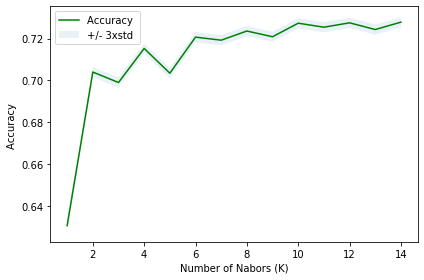

The best accuracy was with 0.7278999823081913 with k= 14


In [21]:


Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [22]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

KNN METRICS:
              precision    recall  f1-score   support

           1       0.74      0.91      0.82     22861
           2       0.65      0.36      0.46     11053

    accuracy                           0.73     33914
   macro avg       0.70      0.63      0.64     33914
weighted avg       0.71      0.73      0.70     33914

Confusion matrix, without normalization
[[20724  2137]
 [ 7108  3945]]
jaccard similarity score:


0.6915145650505522

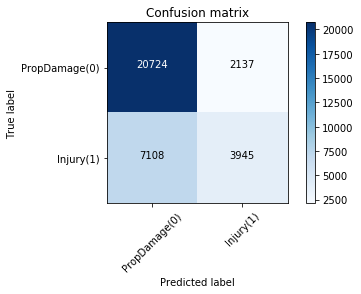

In [24]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import metrics
print('KNN METRICS:')
yhat=neigh.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
#labels=[1,0] because collection=0 and paidoff=1
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PropDamage(0)','Injury(1)'],normalize= False,  title='Confusion matrix')

f1_score(y_test, yhat, average='weighted') 

print('jaccard similarity score:')
jaccard_score(y_test, yhat)

### Decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DECISION TREE METRICS:
              precision    recall  f1-score   support

           1       0.72      0.99      0.83     22861
           2       0.89      0.19      0.31     11053

    accuracy                           0.73     33914
   macro avg       0.81      0.59      0.57     33914
weighted avg       0.77      0.73      0.66     33914

Confusion matrix, without normalization
[[22616   245]
 [ 8966  2087]]
jaccard similarity score:


0.7105916360322996

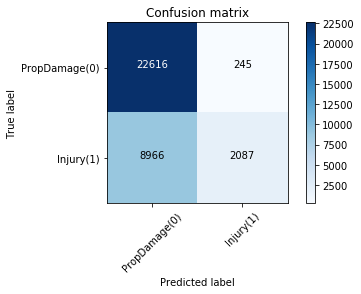

In [26]:
print('DECISION TREE METRICS:')
yhat = drugTree.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PropDamage(0)','Injury(1)'],normalize= False,  title='Confusion matrix')

f1_score(y_test, yhat, average='weighted') 

print('jaccard similarity score:')
jaccard_score(y_test, yhat)

### Log Regr

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LOGISTIC REGRESSION METRICS:
              precision    recall  f1-score   support

           1       0.72      0.97      0.83     22861
           2       0.79      0.24      0.37     11053

    accuracy                           0.73     33914
   macro avg       0.75      0.60      0.60     33914
weighted avg       0.74      0.73      0.68     33914

Confusion matrix, without normalization
[[22138   723]
 [ 8410  2643]]
jaccard similarity score: 0.7079402641424962
Logloss similarity score: 0.5526118895414214


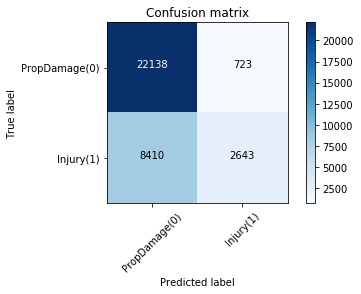

In [28]:
print('LOGISTIC REGRESSION METRICS:')
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PropDamage(0)','Injury(1)'],normalize= False,  title='Confusion matrix')

f1_score(y_test, yhat, average='weighted') 

print(f'jaccard similarity score: {jaccard_score(y_test, yhat)}')



print(f'Logloss similarity score: {log_loss(y_test, yhat_prob)}')

### SVM

In [29]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SUPPORT VECTOR MACHINE METRICS:
              precision    recall  f1-score   support

           1       0.73      0.97      0.83     22861
           2       0.79      0.27      0.40     11053

    accuracy                           0.74     33914
   macro avg       0.76      0.62      0.62     33914
weighted avg       0.75      0.74      0.69     33914

Confusion matrix, without normalization
[[22073   788]
 [ 8083  2970]]
jaccard similarity score:


0.7133208376421923

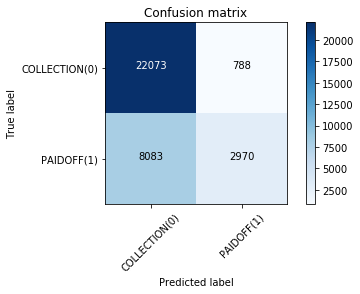

In [30]:
print('SUPPORT VECTOR MACHINE METRICS:')
yhat = clf.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

f1_score(y_test, yhat, average='weighted') 

print('jaccard similarity score:')
jaccard_score(y_test, yhat)

## Conclusions

In this study, I analyzed the relationship between different factors and the cars accidents´ gravity. I identified  Collision address type (ADDRTYPE), Collision type (COLLISIONTYPE), The total number of people involved in the collision (PERSONCOUNT), the total number of people involved in the collision (PEDCOUNT), The number of bicycles involved in the collision (PEDCYLCOUNT) and whether or not the pedestrian right of way was not granted (PEDROWNOTGRNT) among the most important features that affect a car accidents gravity. I built classification models to predict whether a car accident is grave or not severe. These models can be very useful in helping drivers to be carefull in dangerous places and conditions and reduce the number o fatal accidents.